In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf


In [57]:
tickers = ['A', 'AAPL', 'ABT', 'ACN', 'AES', 'AFL' ,'AIV' ,'ALK', 'AMAT', 'AMD' ,'AMGN', 'AMT'
 'ANDV', 'ATVI', 'AXP', 'BA', 'BAC', 'BAX', 'BMY' ,'BSX', 'CAT', 'GOOG', 'GOOGL',
 'MO' ,'T']


In [203]:
df.loc[5,'Close']

18.29387664794922

In [202]:
account_balance = float(1000) / 25
balances = np.array([account_balance] * 25)
first_prices = np.array(df.loc[0, 'Close'].replace(0,1).values.tolist())
# TODO: check if self.day is called on the right day in step process
dates_prices = np.array(df.loc[5,'Close'].replace(0,1).values.tolist()) # todays price
pct_changes = (dates_prices - first_prices) / first_prices
portfolio_value = sum(balances + (balances * pct_changes))

AttributeError: 'numpy.float64' object has no attribute 'replace'

In [66]:
df = pd.read_csv('../data/all_stocks_price.csv')

In [67]:
df = df[(df.ticker.isin(tickers)) & (df.Date < '2012-01-01')]

In [68]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Adj Close,ticker
223293,248,2011-12-23,70.014359,70.181422,69.596706,70.052330,3368600.0,0.0,0.0,70.052330,CAT
223294,249,2011-12-27,69.634715,70.151090,69.490437,69.520813,3216200.0,0.0,0.0,69.520813,CAT
223295,250,2011-12-28,69.680247,69.710623,67.713463,67.865341,5248800.0,0.0,0.0,67.865341,CAT
223296,251,2011-12-29,67.933678,68.996804,67.933678,68.784180,3570800.0,0.0,0.0,68.784180,CAT
223297,252,2011-12-30,68.890497,69.422057,68.647497,68.799370,3279800.0,0.0,0.0,68.799370,CAT


In [69]:
df = df.reset_index()
df = df[['Date', 'Close', 'ticker']]
df.head()
df_pivot=df.pivot('Date','ticker','Close').reset_index()

In [70]:
corr_df = df_pivot.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)

ticker,A,AAPL,ABT,ACN,AES,AFL,AIV,ALK,AMAT,AMD,...,BA,BAC,BAX,BMY,BSX,CAT,GOOG,GOOGL,MO,T
ticker,,,,,,,,,,,,,,,,,,,,,
A,1.000000,-0.719498,-0.194459,0.211715,0.847349,0.665781,0.604485,0.294612,0.688631,0.740632,...,0.817696,0.727705,0.486162,-0.544647,0.771195,0.863716,-0.221974,-0.221974,-0.289365,0.419414
AAPL,-0.719498,1.000000,0.546509,0.332826,-0.632473,-0.631832,-0.286999,0.086756,-0.648000,-0.720375,...,-0.496914,-0.777160,-0.023910,0.761017,-0.717043,-0.527675,0.291535,0.291535,0.546409,0.008242
ABT,-0.194459,0.546509,1.000000,0.684801,-0.265574,-0.540625,-0.146874,0.598162,-0.658866,-0.635880,...,0.082356,-0.759616,0.409650,0.887791,-0.635054,-0.109640,-0.118138,-0.118138,0.948369,0.701526
ACN,0.211715,0.332826,0.684801,1.000000,0.068100,-0.189591,0.138610,0.539148,-0.242626,-0.346685,...,0.264642,-0.366432,0.634170,0.505565,-0.232801,0.298728,-0.062788,-0.062788,0.570158,0.725462
AES,0.847349,-0.632473,-0.265574,0.068100,1.000000,0.858441,0.383327,0.389897,0.781271,0.743349,...,0.836061,0.777261,0.096368,-0.524941,0.717861,0.880125,0.237209,0.237209,-0.331392,0.206786
AFL,0.665781,-0.631832,-0.540625,-0.189591,0.858441,1.000000,0.199555,0.174398,0.924531,0.776783,...,0.642261,0.873611,-0.202369,-0.655210,0.694396,0.702187,0.385935,0.385935,-0.577491,-0.119927
AIV,0.604485,-0.286999,-0.146874,0.138610,0.383327,0.199555,1.000000,-0.093808,0.345635,0.522435,...,0.339407,0.436972,0.609042,-0.410873,0.655978,0.483342,-0.312557,-0.312557,-0.283645,0.316545
ALK,0.294612,0.086756,0.598162,0.539148,0.389897,0.174398,-0.093808,1.000000,-0.040859,-0.149859,...,0.636115,-0.141503,0.180141,0.469974,-0.226059,0.382835,0.257167,0.257167,0.582713,0.600644
AMAT,0.688631,-0.648000,-0.658866,-0.242626,0.781271,0.924531,0.345635,-0.040859,1.000000,0.873490,...,0.557835,0.927149,-0.090051,-0.782493,0.798507,0.710566,0.203567,0.203567,-0.692090,-0.171658


<Figure size 432x288 with 0 Axes>

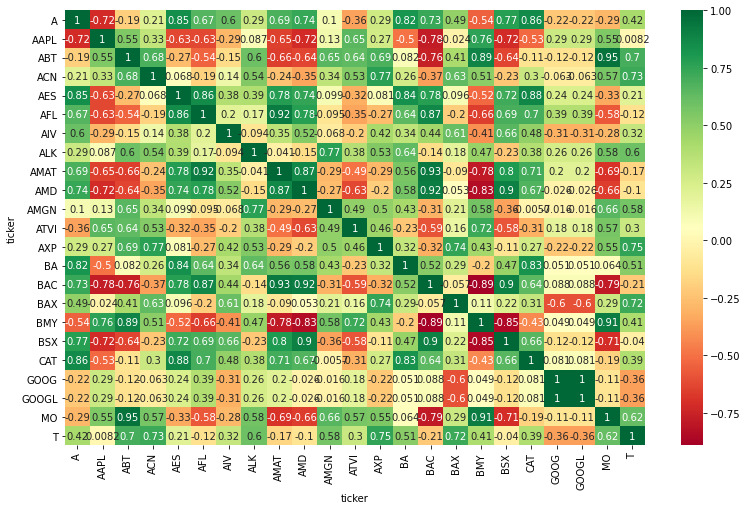

<Figure size 432x288 with 0 Axes>

In [71]:
plt.figure(figsize=(13, 8))
sns.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()

In [12]:
corr_df.head()

ticker,A,AAPL,ABT,ACN,AES,AFL,AIV,ALK,AMAT,AMD,...,BA,BAC,BAX,BMY,BSX,CAT,GOOG,GOOGL,MO,T
ticker,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.967496,0.960909,0.980141,0.909562,0.857303,0.881065,0.396951,0.971757,0.938624,...,0.603686,0.911384,0.857118,0.687013,0.857677,0.942629,0.987131,0.985739,0.548172,0.574637
AAPL,0.967496,1.000000,0.960110,0.957774,0.911326,0.759664,0.800076,0.305741,0.942091,0.976780,...,0.482270,0.831413,0.813592,0.662520,0.795030,0.905133,0.954710,0.952459,0.456945,0.513542
ABT,0.960909,0.960110,1.000000,0.978847,0.905873,0.866058,0.855438,0.394002,0.911984,0.929914,...,0.651991,0.893722,0.915230,0.709211,0.900773,0.904311,0.954896,0.954635,0.528087,0.611336
ACN,0.980141,0.957774,0.978847,1.000000,0.882756,0.898005,0.908753,0.468187,0.946369,0.918190,...,0.671278,0.928201,0.912333,0.739541,0.915719,0.918026,0.985742,0.986202,0.612997,0.664968
AES,0.909562,0.911326,0.905873,0.882756,1.000000,0.769520,0.785622,0.243338,0.894996,0.910509,...,0.501394,0.803526,0.739394,0.529094,0.738816,0.896377,0.884574,0.879647,0.327672,0.432449


In [17]:
df = corr_df.rename_axis(None).rename_axis(None, axis=1)
df1 = df.stack().reset_index()
df1.columns = ['stock1','stock2','value']

In [18]:
df1.head()

,stock1,stock2,value
0,A,A,1.000000
1,A,AAPL,0.967496
2,A,ABT,0.960909
3,A,ACN,0.980141
4,A,AES,0.909562


In [19]:
df1.describe()

,value
count,625.000000
mean,0.799879
std,0.164896
min,0.167872
25%,0.721074
50%,0.863998
75%,0.916588
max,1.000000


In [196]:
processed = pd.read_csv('../clustered_all_5y-v4_processed.csv')

In [141]:
dtwo = pd.read_csv('../../clustered_all-v2_from_2011_1_to_2012_1.csv')

In [188]:
processed = processed.sort_values(['Date','ticker']).reset_index()

<AxesSubplot:>

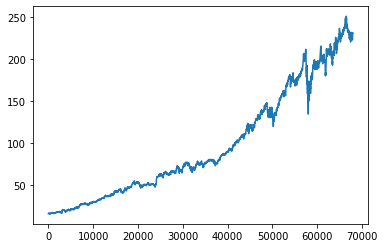

In [194]:
processed[processed.ticker == 'V'].Close.plot()

In [190]:
processed.to_csv('../clustered_all_5y-v4_processed.csv')

In [200]:
processed.ticker.unique()

array(['AAL', 'AAPL', 'ABT', 'ADM', 'AES', 'AFL', 'AIG', 'AIV', 'ALB',
       'AMAT', 'AMD', 'APA', 'ATVI', 'AXP', 'BA', 'BAC', 'BAX', 'BBY',
       'BMY', 'BSX', 'CAT', 'CCL', 'COG', 'MO', 'T', 'ABBV', 'AET',
       'ANDV', 'AOS', 'AYI', 'CA', 'CAH', 'CNP', 'CPB', 'MMM'],
      dtype=object)

In [195]:
processed.ticker.unique()

array(['AAL', 'AAPL', 'ABBV', 'AIG', 'AIV', 'AMAT', 'AMD', 'AOS', 'ATVI',
       'AYI', 'BA', 'BAC', 'BMY', 'BSX', 'CAH', 'CCL', 'CNP', 'COG',
       'CPB', 'GOOGL', 'MMM', 'MO', 'MSFT', 'T', 'V'], dtype=object)

In [94]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4385939721493818874
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7047741440
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12462219493739680368
physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
]
